In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
# write your code here
with sqlite3.connect("../db.sqlite3") as conn:
    query = """
    SELECT *
    FROM restaurant_orderitem
    JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
    JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
    """
    data = pd.read_sql(query, conn)

data.to_csv("data.csv", index=False)
df = pd.read_csv("data.csv")
df.head()

,id,quantity,order_id,product_id,id.1,datetime,id.2,price,name
0,1,2,1,6,1,2019-08-03 20:25:00,6,0.80,Plain Papadum
1,2,1,1,240,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti
2,3,1,1,19,1,2019-08-03 20:25:00,19,2.95,Garlic Naan
3,4,1,1,36,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice
4,5,1,1,111,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

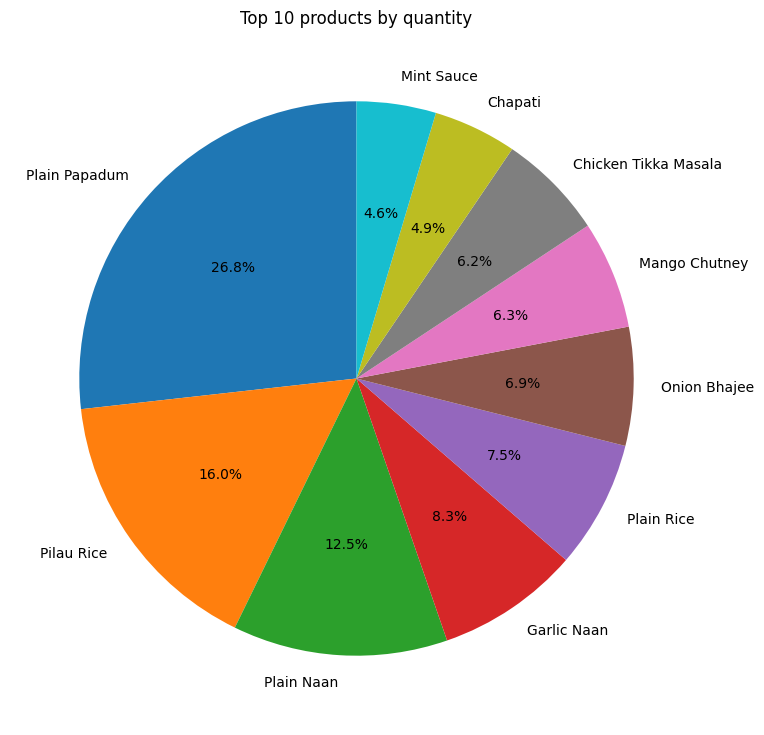

In [3]:
# write your code here
top_by_quantity = (
    df.groupby("name").sum().sort_values(by="quantity", ascending=False).head(10)
)

plt.figure(figsize=(9, 9))
plt.pie(top_by_quantity["quantity"], labels=top_by_quantity.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 products by quantity")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

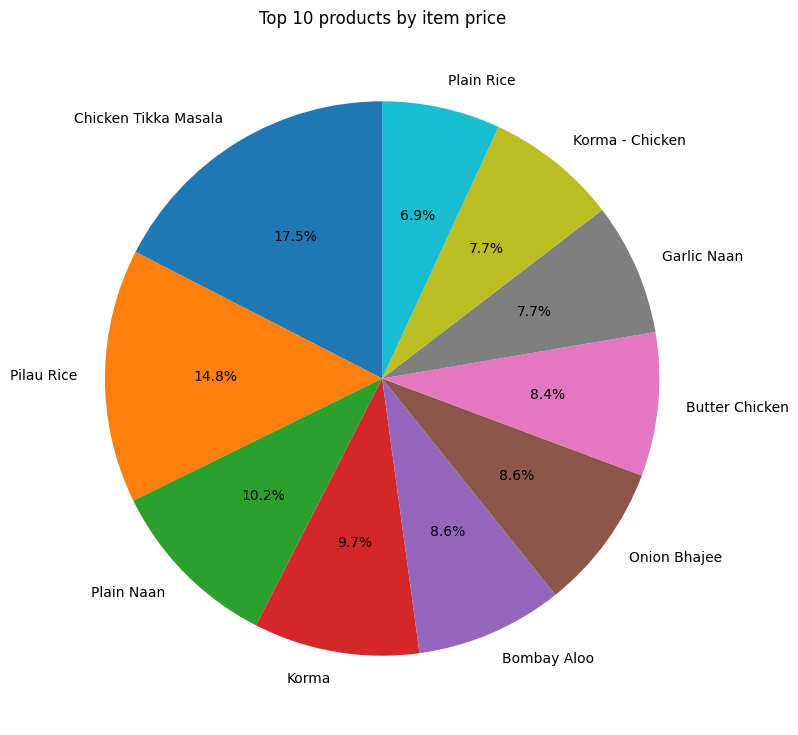

In [4]:
# write your code here
df["item_price"] = df["price"] * df["quantity"]
top_by_item_price = (
    df.groupby("name").sum().sort_values(by="item_price", ascending=False).head(10)
)

plt.figure(figsize=(9, 9))
plt.pie(top_by_item_price["item_price"], labels=top_by_item_price.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 products by item price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

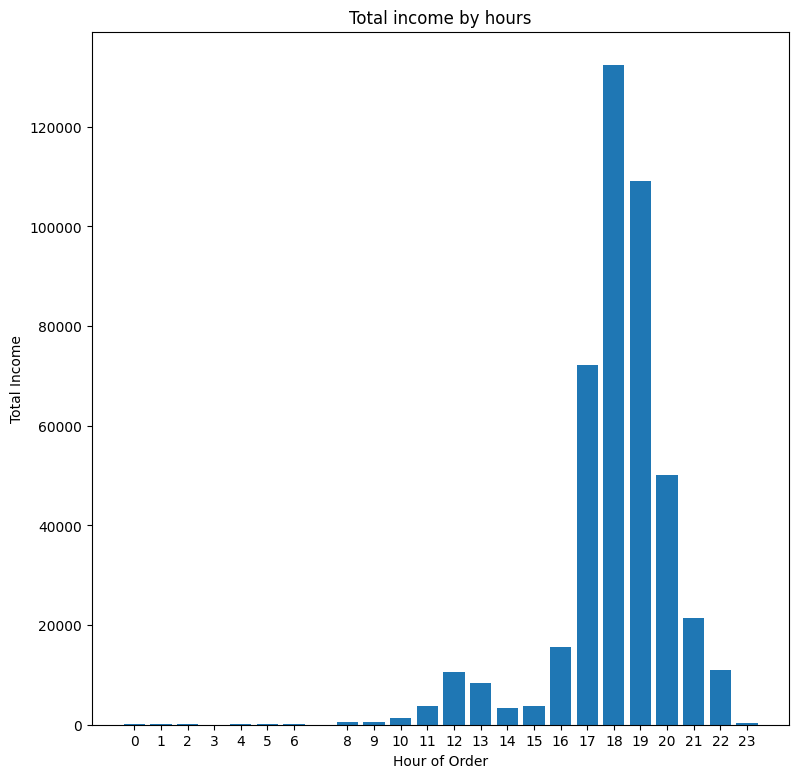

In [5]:
# write your code here
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income_by_hour = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(9, 9))
plt.bar(income_by_hour.index, income_by_hour.values)
plt.xticks(income_by_hour.index)
plt.title("Total income by hours")
plt.xlabel("Hour of Order")
plt.ylabel("Total Income")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

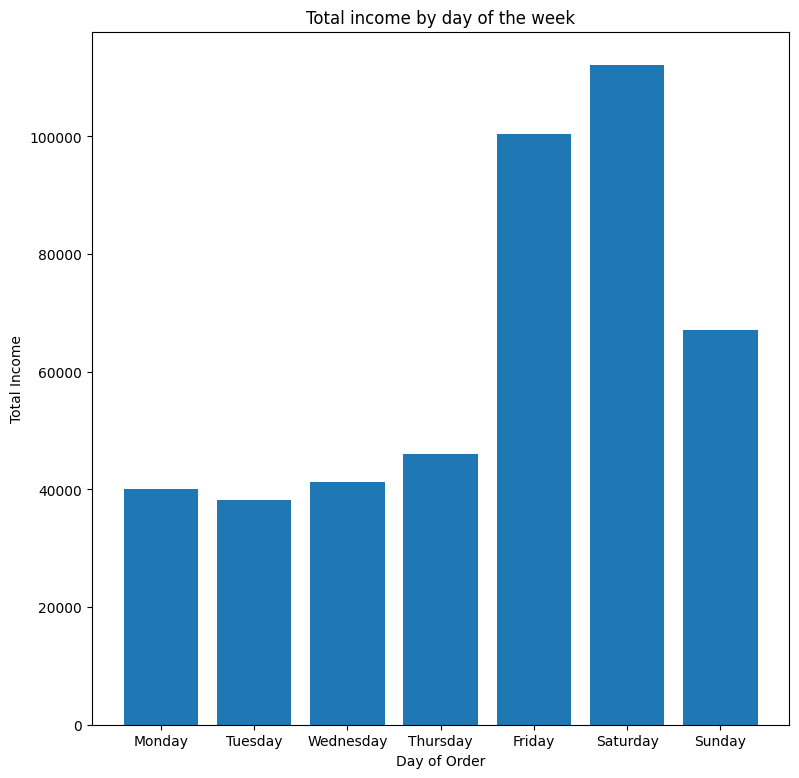

In [6]:
# write your code here
df["order_day"] = df["datetime"].dt.day_name()
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_day = df.groupby("order_day")["item_price"].sum().reindex(days_of_week)

plt.figure(figsize=(9, 9))
plt.bar(income_by_day.index, income_by_day.values)
plt.xticks(income_by_day.index)
plt.title("Total income by day of the week")
plt.xlabel("Day of Order")
plt.ylabel("Total Income")
plt.show()